In [4]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
# !wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2023-04-01 10:39:23--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  6.42MB/s    in 0.5s    

2023-04-01 10:39:25 (6.42 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [5]:
from transformers import pipeline

import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix


In [6]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

2023-04-01 10:40:13.694269: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-01 10:40:13.694834: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [7]:
classifier([
  "This course is just what I needed.",
  "I can't understand any of this. Instructor kept telling me to meet the \
    prerequisites. What are prerequisites? Why does he keep saying that?"
])

[{'label': 'POSITIVE', 'score': 0.9991594552993774},
 {'label': 'NEGATIVE', 'score': 0.9966675639152527}]

In [9]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [13]:
df_ = pd.read_csv("./data/AirlineTweets.csv")

In [14]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [22]:
df = df_[["airline_sentiment", "text"]].copy()
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


<AxesSubplot:>

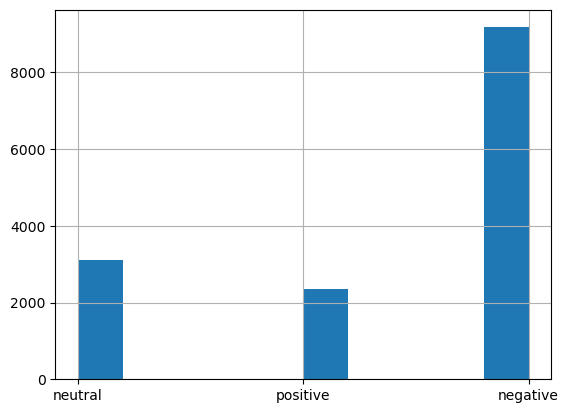

In [17]:
df["airline_sentiment"].hist()

In [23]:
df = df[df.airline_sentiment!="neutral"].copy()
df

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...
14633,negative,@AmericanAir my flight was Cancelled Flightled...
14634,negative,@AmericanAir right on cue with the delays👌
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...


<AxesSubplot:>

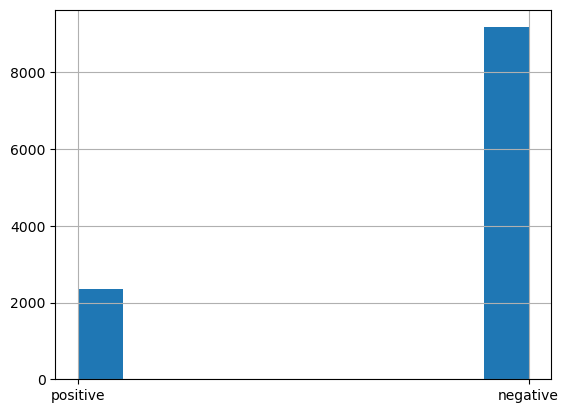

In [19]:
df["airline_sentiment"].hist()

In [24]:
target_map = {"positive":1, "negative":0}
df["target"] = df["airline_sentiment"].map(target_map)

In [25]:
df

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1
...,...,...,...
14633,negative,@AmericanAir my flight was Cancelled Flightled...,0
14634,negative,@AmericanAir right on cue with the delays👌,0
14635,positive,@AmericanAir thank you we got on a different f...,1
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...,0


In [34]:
texts = df["text"].tolist()

preds = classifier(texts[:500])
preds

[{'label': 'POSITIVE', 'score': 0.6070849299430847},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854250550270081},
 {'label': 'POSITIVE', 'score': 0.9553213715553284},
 {'label': 'POSITIVE', 'score': 0.9827088117599487},
 {'label': 'POSITIVE', 'score': 0.9994851350784302},
 {'label': 'POSITIVE', 'score': 0.9993509650230408},
 {'label': 'POSITIVE', 'score': 0.9940821528434753},
 {'label': 'POSITIVE', 'score': 0.9863133430480957},
 {'label': 'POSITIVE', 'score': 0.9996304512023926},
 {'label': 'NEGATIVE', 'score': 0.9980512857437134},
 {'label': 'POSITIVE', 'score': 0.9964436888694763},
 {'label': 'NEGATIVE', 'score': 0.9968666434288025},
 {'label': 'POSITIVE', 'score': 0.9787646532058716},
 {'label': 'POSITIVE', 'score': 0.9995218515396118},
 {'label': 'NEGATIVE', 'score': 0.9954516291618347},
 {'label': 'POSITIVE', 'score': 0.9995624423027039},
 {'label': 'POSITIVE', 'score': 0.999874830245

In [37]:
probs = [ d["score"] if d["label"].startswith("P") else 1-d["score"] for d in preds]

In [38]:
probs

[0.6070849299430847,
 0.0026550889015197754,
 0.0004176497459411621,
 0.014574944972991943,
 0.9553213715553284,
 0.9827088117599487,
 0.9994851350784302,
 0.9993509650230408,
 0.9940821528434753,
 0.9863133430480957,
 0.9996304512023926,
 0.001948714256286621,
 0.9964436888694763,
 0.0031333565711975098,
 0.9787646532058716,
 0.9995218515396118,
 0.004548370838165283,
 0.9995624423027039,
 0.9998748302459717,
 0.004880666732788086,
 0.00040477514266967773,
 0.0006322264671325684,
 0.015428304672241211,
 0.01828092336654663,
 0.0004482865333557129,
 0.0023748278617858887,
 0.9934480786323547,
 0.9976067543029785,
 0.8661737442016602,
 0.0003237724304199219,
 0.8415601253509521,
 0.0032317638397216797,
 0.9997846484184265,
 0.17614459991455078,
 0.9993895292282104,
 0.09156614542007446,
 0.004861712455749512,
 0.9997820258140564,
 0.0014235973358154297,
 0.004673957824707031,
 0.00464242696762085,
 0.019041001796722412,
 0.991169810295105,
 0.01255035400390625,
 0.00809931755065918,
 0.

In [39]:
pred_labels = [ 1 if d["label"].startswith("P") else 0 for d in preds]
pred_labels

[1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,


In [40]:
pred_labels = np.array(pred_labels)

In [50]:
print(f"acc: {np.mean(df['target'][:500]==pred_labels)}")

acc: 0.884


In [53]:
cm = confusion_matrix(df['target'][:500], pred_labels, normalize="true")

In [54]:
cm

array([[0.91021672, 0.08978328],
       [0.16384181, 0.83615819]])

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

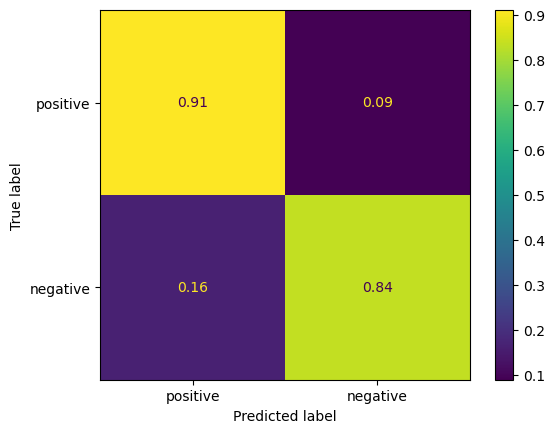

In [59]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "negative"])
disp.plot()


In [60]:
f1_score(df['target'][:500], pred_labels)

0.8361581920903954

In [61]:
f1_score(1-df['target'][:500], 1-pred_labels)

0.9102167182662538

In [62]:
roc_auc_score(df['target'][:500], pred_labels)

0.8731874551783245

In [63]:
roc_auc_score(1-df['target'][:500], 1-pred_labels)

0.8731874551783246

# Fundamentals

Steps:
-  Document to tokens (split (\n), sub words)
-  map tokens
- padding/ truncation (fixed lenght)


"I like cats. do you like cats?" 

split could give us - "cats." and "cats?"
that is not right

In [9]:
from transformers import AutoTokenizer

In [3]:
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [4]:
tokenizer("hello world")

{'input_ids': [101, 7592, 2088, 102], 'attention_mask': [1, 1, 1, 1]}

In [5]:
tokens = tokenizer.tokenize("hello world")
tokens

['hello', 'world']

In [6]:
tokenizer.convert_tokens_to_ids(tokens)

[7592, 2088]

In [9]:
token_ids = tokenizer.encode(tokens) # adds cls and sep

In [11]:
tokenizer.convert_ids_to_tokens(token_ids)

['[CLS]', 'hello', '[SEP]', 'world', '[SEP]']

In [12]:
tokenizer.decode(token_ids)

'[CLS] hello [SEP] world [SEP]'

In [16]:
output = tokenizer.tokenize("hello world", return_tensors='pt')

In [17]:
output, type(output)

(['hello', 'world'], list)

In [24]:
data = ["I like cats", "do you like cats too? and could like buy some, they are going to slaughter house if you ignore them"]

In [25]:
tokenizer(data)

{'input_ids': [[101, 1045, 2066, 8870, 102], [101, 2079, 2017, 2066, 8870, 2205, 1029, 1998, 2071, 2066, 4965, 2070, 1010, 2027, 2024, 2183, 2000, 14574, 2160, 2065, 2017, 8568, 2068, 102]], 'attention_mask': [[1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [30]:
tokenizer(data,  return_tensors='pt',padding=True, truncation=True) # cannot have variable length if they are in batches

{'input_ids': tensor([[  101,  1045,  2066,  8870,   102,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0],
        [  101,  2079,  2017,  2066,  8870,  2205,  1029,  1998,  2071,  2066,
          4965,  2070,  1010,  2027,  2024,  2183,  2000, 14574,  2160,  2065,
          2017,  8568,  2068,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [17]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_clas

In [32]:
model_inputs = tokenizer(data,  return_tensors='pt',padding=True, truncation=True)

outputs = model(**model_inputs)

In [33]:
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[-2.2665,  2.3656],
        [ 3.0807, -2.5620]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [41]:
tokenizer

PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased-finetuned-sst-2-english', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [42]:
input = "hello world"

In [44]:
tokens = tokenizer.tokenize(input)

In [45]:
t_ids = tokenizer.convert_tokens_to_ids(tokens)

In [46]:
tokenizer.convert_ids_to_tokens(t_ids)

['hello', 'world']

In [47]:
tokenizer.decode(t_ids)

'hello world'

In [48]:
tokenizer.encode(input)

[101, 7592, 2088, 102]

In [49]:
tokenizer.decode(tokenizer.encode(input))

'[CLS] hello world [SEP]'

In [51]:
model_inputs = tokenizer(input)
model_inputs

{'input_ids': [101, 7592, 2088, 102], 'attention_mask': [1, 1, 1, 1]}

In [54]:
tokenizer(data)

{'input_ids': [[101, 1045, 2066, 8870, 102], [101, 2079, 2017, 2066, 8870, 2205, 1029, 1998, 2071, 2066, 4965, 2070, 1010, 2027, 2024, 2183, 2000, 14574, 2160, 2065, 2017, 8568, 2068, 102]], 'attention_mask': [[1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [55]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

In [58]:
outputs = model(**model_inputs)

AttributeError: 'list' object has no attribute 'size'

In [64]:
model_inputs = tokenizer(input,  return_tensors='pt',padding=True, truncation=True)

In [65]:
outputs = model(**model_inputs)

outputs # default is binary classifier

SequenceClassifierOutput(loss=None, logits=tensor([[-3.9943,  4.3083]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [68]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3, ignore_mismatched_sizes=True)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([3]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [69]:
outputs = model(**model_inputs)

outputs # default is binary classifier

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.1777,  0.0031, -0.4256]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [71]:
outputs.logits, outputs["logits"], outputs[0]

(tensor([[ 0.1777,  0.0031, -0.4256]], grad_fn=<AddmmBackward0>),
 tensor([[ 0.1777,  0.0031, -0.4256]], grad_fn=<AddmmBackward0>),
 tensor([[ 0.1777,  0.0031, -0.4256]], grad_fn=<AddmmBackward0>))

In [72]:
outputs.logits.detach().cpu().numpy()

array([[ 0.17774086,  0.0030804 , -0.42559427]], dtype=float32)

In [74]:
model_inputs = tokenizer(data,  return_tensors='pt',padding=True, truncation=True)
outputs = model(**model_inputs)
model_inputs, outputs

({'input_ids': tensor([[  101,  1045,  2066,  8870,   102,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0],
         [  101,  2079,  2017,  2066,  8870,  2205,  1029,  1998,  2071,  2066,
           4965,  2070,  1010,  2027,  2024,  2183,  2000, 14574,  2160,  2065,
           2017,  8568,  2068,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])},
 SequenceClassifierOutput(loss=None, logits=tensor([[ 0.1906,  0.0069, -0.1890],
         [ 0.3285,  0.3016,  0.3484]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None))

In [75]:
model_inputs["attention_mask"]

tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

# Transfer learning/ Fine tuning 

- Try more expirements

- only train bias parameter for better improvments (https://arxiv.org/abs/2106.10199)

- dataset representation 
- trainer, trainingarguments objects
- computing metrics
- saving the model

In [76]:
# !pip install datasets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     |████████████████████████████████| 468 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 337 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 110 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 145 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 199 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 22.4 MB 4.5 MB/s eta 0:00:01
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
     |████████████████████████████████| 57 kB 3.3 MB/s eta 0:00:01
  Attempting uninstall: huggingface-hub
    Found existing installation

In [94]:
# from huggingface_hub import notebook_login
# notebook_login()
!huggingface-cli login

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information 

In [1]:
from datasets import load_dataset, list_datasets
import numpy as np

# list_datasets()
# raw_datasets = load_dataset("amazon_polarity")
raw_datasets = load_dataset("glue","sst2")

Found cached dataset glue (/Users/sanjeevhalyal/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

In [3]:
raw_datasets["train"].data.column_names, dir(raw_datasets["train"].data.column_names)

(['sentence', 'label', 'idx'],
 ['__add__',
  '__class__',
  '__contains__',
  '__delattr__',
  '__delitem__',
  '__dir__',
  '__doc__',
  '__eq__',
  '__format__',
  '__ge__',
  '__getattribute__',
  '__getitem__',
  '__gt__',
  '__hash__',
  '__iadd__',
  '__imul__',
  '__init__',
  '__init_subclass__',
  '__iter__',
  '__le__',
  '__len__',
  '__lt__',
  '__mul__',
  '__ne__',
  '__new__',
  '__reduce__',
  '__reduce_ex__',
  '__repr__',
  '__reversed__',
  '__rmul__',
  '__setattr__',
  '__setitem__',
  '__sizeof__',
  '__str__',
  '__subclasshook__',
  'append',
  'clear',
  'copy',
  'count',
  'extend',
  'index',
  'insert',
  'pop',
  'remove',
  'reverse',
  'sort'])

In [4]:
raw_datasets["train"][0], raw_datasets["train"][50000:50003]

({'sentence': 'hide new secretions from the parental units ',
  'label': 0,
  'idx': 0},
 {'sentence': ['glow ',
   'a classical dramatic animated feature ',
   'best espionage picture '],
  'label': [1, 1, 1],
  'idx': [50000, 50001, 50002]})

In [5]:
raw_datasets["train"].features

{'sentence': Value(dtype='string', id=None),
 'label': ClassLabel(names=['negative', 'positive'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [6]:
checkpoint = "distilbert-base-uncased"

In [10]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [11]:
tokenizer(raw_datasets["train"][:3]["sentence"])

{'input_ids': [[101, 5342, 2047, 3595, 8496, 2013, 1996, 18643, 3197, 102], [101, 3397, 2053, 15966, 1010, 2069, 4450, 2098, 18201, 2015, 102], [101, 2008, 7459, 2049, 3494, 1998, 10639, 2015, 2242, 2738, 3376, 2055, 2529, 3267, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [12]:
def tokenize_fn(batch):
    return tokenizer(batch["sentence"], truncation=True)

In [13]:
tokenized_datasets = raw_datasets.map(tokenize_fn, batched=True)

Loading cached processed dataset at /Users/sanjeevhalyal/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad/cache-564bfe9e7f0a5e11.arrow


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Loading cached processed dataset at /Users/sanjeevhalyal/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad/cache-349e02502479a196.arrow


In [14]:
from transformers import TrainingArguments

In [15]:
training_args =  TrainingArguments(
"model_0", evaluation_strategy='epoch', save_strategy='epoch', num_train_epochs=1)

In [76]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)


loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /Users/sanjeevhalyal/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.20.0",
  "vocab_size": 30522
}

loading weights file https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin from cache at /Users/sanjeevhalyal/.cache/huggingf

In [19]:
type(model)

transformers.models.distilbert.modeling_distilbert.DistilBertForSequenceClassification

In [20]:
# !pip install torchinfo

In [21]:
from torchinfo import summary

summary(model), model

(================================================================================
 Layer (type:depth-idx)                                  Param #
 DistilBertForSequenceClassification                     --
 ├─DistilBertModel: 1-1                                  --
 │    └─Embeddings: 2-1                                  --
 │    │    └─Embedding: 3-1                              23,440,896
 │    │    └─Embedding: 3-2                              393,216
 │    │    └─LayerNorm: 3-3                              1,536
 │    │    └─Dropout: 3-4                                --
 │    └─Transformer: 2-2                                 --
 │    │    └─ModuleList: 3-5                             42,527,232
 ├─Linear: 1-2                                           590,592
 ├─Linear: 1-3                                           1,538
 ├─Dropout: 1-4                                          --
 Total params: 66,955,010
 Trainable params: 66,955,010
 Non-trainable params: 0
 ===================

In [77]:
#  to make sure we are only fine tunning head

params_before = []
for name, p in model.named_parameters():
    params_before.append(p.detach().cpu().numpy())

In [23]:
from transformers import Trainer
from datasets import load_metric

metric = load_metric("glue","sst2")

/var/folders/0j/5__hz27s6d5gvt1vgl8zpwpw0000gn/T/ipykernel_4108/1529933756.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("glue","sst2")


In [24]:
metric.compute(predictions=[1,0,1],references=[1,0,0]  )

{'accuracy': 0.6666666666666666}

In [ ]:
# because trainer need this kind of function to get metrics
def compute_metrics(logits_labels):
    logits, lables = logits_labels
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions,references=lables  )

In [59]:
model.to("mps:0")

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [63]:
tokenized_datasets["train"][:0]

{'sentence': [], 'label': [], 'idx': [], 'input_ids': [], 'attention_mask': []}

In [78]:
# import torch
# from torch import nn

# class CustomTrainer(Trainer):
#     def compute_loss(self, model, inputs, return_outputs=False):
#         labels = inputs.get("labels")
#         # forward pass
#         outputs = model(**inputs)
#         logits = outputs.get("logits")
#         # compute custom loss (suppose one has 3 labels with different weights)
#         loss_fct = nn.CrossEntropyLoss(weight=torch.tensor([1.0, 2.0]))
#         loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
#         return (loss, outputs) if return_outputs else loss

trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_datasets["train"],
    eval_dataset = tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [80]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: sentence, idx. If sentence, idx are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 67349
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 8419


Epoch,Training Loss,Validation Loss,Accuracy
1,0.192200,0.335332,0.915138


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: sentence, idx. If sentence, idx are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 872
  Batch size = 8
Saving model checkpoint to my_trainer/checkpoint-8419
Configuration saved in my_trainer/checkpoint-8419/config.json
Model weights saved in my_trainer/checkpoint-8419/pytorch_model.bin
tokenizer config file saved in my_trainer/checkpoint-8419/tokenizer_config.json
Special tokens file saved in my_trainer/checkpoint-8419/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=8419, training_loss=0.2602725995806082, metrics={'train_runtime': 1914.1949, 'train_samples_per_second': 35.184, 'train_steps_per_second': 4.398, 'total_flos': 522523345957128.0, 'train_loss': 0.2602725995806082, 'epoch': 1.0})

In [81]:
trainer.save_model("model_0_sentiment_analysis")

Saving model checkpoint to model_0_sentiment_analysis
Configuration saved in model_0_sentiment_analysis/config.json
Model weights saved in model_0_sentiment_analysis/pytorch_model.bin
tokenizer config file saved in model_0_sentiment_analysis/tokenizer_config.json
Special tokens file saved in model_0_sentiment_analysis/special_tokens_map.json


In [86]:
from transformers import pipeline


In [87]:
new_model = pipeline("text-classification", model="model_0_sentiment_analysis")

loading configuration file model_0_sentiment_analysis/config.json
Model config DistilBertConfig {
  "_name_or_path": "model_0_sentiment_analysis",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.20.0",
  "vocab_size": 30522
}

loading configuration file model_0_sentiment_analysis/config.json
Model config DistilBertConfig {
  "_name_or_path": "model_0_sentiment_analysis",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "d

In [88]:
new_model("the movie sucks")

[{'label': 'LABEL_0', 'score': 0.9934877157211304}]

In [89]:
new_model("the movie is great")

[{'label': 'LABEL_1', 'score': 0.9995834231376648}]

In [96]:
import json
with open("model_0_sentiment_analysis/config.json") as f:
    j = json.load(f)
    
j["id2label"]= {0:"negative", 1:"positive"}

json.dumps(j,"./model_0_sentiment_analysis/config.json" )

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [98]:
new_model = pipeline("text-classification", model="model_0_sentiment_analysis")

loading configuration file model_0_sentiment_analysis/config.json
Model config DistilBertConfig {
  "_name_or_path": "model_0_sentiment_analysis",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "negative",
    "1": "positive"
  },
  "initializer_range": 0.02,
  "label2id": null,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.20.0",
  "vocab_size": 30522
}

loading configuration file model_0_sentiment_analysis/config.json
Model config DistilBertConfig {
  "_name_or_path": "model_0_sentiment_analysis",
  "activation": "gelu",
  "architectures": [
    "Distil

In [99]:
new_model("the movie sucks")

[{'label': 'negative', 'score': 0.9934877157211304}]

In [100]:
new_model("the movie is great")

[{'label': 'positive', 'score': 0.9995834231376648}]

In [107]:
#  to make sure we are only fine tunning head

params_after = []
for name, p in new_model.model.named_parameters():
    params_after.append(p.detach().cpu().numpy())

In [108]:
params_after

[array([[-0.01664949, -0.06661227, -0.01632868, ..., -0.01999032,
         -0.05139988, -0.0263568 ],
        [-0.01319846, -0.06733431, -0.01605646, ..., -0.0226614 ,
         -0.05537301, -0.02600443],
        [-0.01759106, -0.07094341, -0.01443494, ..., -0.02457913,
         -0.05956192, -0.0231829 ],
        ...,
        [-0.0231029 , -0.05878259, -0.01048967, ..., -0.01945743,
         -0.02615411, -0.02118432],
        [-0.0490171 , -0.05614787, -0.00465348, ..., -0.01065376,
         -0.01797333, -0.02187675],
        [-0.00646111, -0.0914881 , -0.00254872, ..., -0.01505679,
         -0.05040044,  0.04597744]], dtype=float32),
 array([[ 0.01835063, -0.02449168, -0.03312674, ...,  0.00115633,
          0.00184111,  0.01226773],
        [ 0.00764941,  0.00395361, -0.01715034, ...,  0.02619046,
          0.03022251, -0.00649127],
        [-0.00905433, -0.00206825, -0.01016923, ...,  0.01668969,
          0.01440139, -0.00729381],
        ...,
        [ 0.01741793,  0.00349027, -0.0

In [109]:
params_before

[array([[-0.01664949, -0.06661227, -0.01632868, ..., -0.01999032,
         -0.05139988, -0.0263568 ],
        [-0.01319846, -0.06733431, -0.01605646, ..., -0.0226614 ,
         -0.05537301, -0.02600443],
        [-0.01759106, -0.07094341, -0.01443494, ..., -0.02457913,
         -0.05956192, -0.0231829 ],
        ...,
        [-0.0231029 , -0.05878259, -0.01048967, ..., -0.01945743,
         -0.02615411, -0.02118432],
        [-0.0490171 , -0.05614787, -0.00465348, ..., -0.01065376,
         -0.01797333, -0.02187675],
        [-0.00646111, -0.0914881 , -0.00254872, ..., -0.01505679,
         -0.05040044,  0.04597744]], dtype=float32),
 array([[ 0.01835063, -0.02449168, -0.03312674, ...,  0.00115633,
          0.00184111,  0.01226773],
        [ 0.00764941,  0.00395361, -0.01715034, ...,  0.02619046,
          0.03022251, -0.00649127],
        [-0.00905433, -0.00206825, -0.01016923, ...,  0.01668969,
          0.01440139, -0.00729381],
        ...,
        [ 0.01741793,  0.00349027, -0.0

In [110]:
for p1, p2 in zip(params_before, params_after):
    print(np.sum(np.abs(p1-p2)))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


# Fine tuning on custom data

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import torch

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


In [149]:
data = pd.read_csv("./data/AirlineTweets.csv")

In [150]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [221]:
df = data[["airline_sentiment", "text"]].copy()
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [220]:
# df = df[df["airline_sentiment"]!="neutral"]
# df

In [224]:
target_map = {"positive": 1, "negative":0, "neutral":2}
df["label"] = df["airline_sentiment"].map(target_map)
df

,airline_sentiment,text,label
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
...,...,...,...
14635,positive,@AmericanAir thank you we got on a different f...,1
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...,0
14637,neutral,@AmericanAir Please bring American Airlines to...,2
14638,negative,"@AmericanAir you have my money, you change my ...",0


In [225]:
df2 = df[["text", "label"]]
df2.columns = ["sentence", "label"] 

In [226]:
df2.to_csv("./data/airline_data.csv", index=None)

In [227]:
import datasets

In [228]:
raw_dataset = datasets.load_dataset('csv', data_files="./data/airline_data.csv")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /Users/sanjeevhalyal/.cache/huggingface/datasets/csv/default-e6efd681f426fca8/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [229]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 14640
    })
})

In [230]:
split = raw_dataset["train"].train_test_split(test_size=0.3, seed=42)

In [231]:
split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4392
    })
})

In [232]:
checkpoint= 'distilbert-base-uncased'

In [233]:
from transformers import AutoTokenizer

In [234]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /Users/sanjeevhalyal/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.20.0",
  "vocab_size": 30522
}

loading file https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt from cache at /Users/sanjeevhalyal/.cache/huggingface/transformers

In [235]:
def tokenizer_fn(batch):
    return tokenizer(batch["sentence"], truncation=True)

In [236]:
tokenizer_train = split["train"].map(tokenizer_fn, batched=True)

Map:   0%|          | 0/10248 [00:00<?, ? examples/s]

In [237]:
tokenizer_eval = split["test"].map(tokenizer_fn, batched=True)

Map:   0%|          | 0/4392 [00:00<?, ? examples/s]

In [238]:
tokenizer_dataset = split.map(tokenizer_fn, batched=True)
tokenizer_dataset

Map:   0%|          | 0/10248 [00:00<?, ? examples/s]

Loading cached processed dataset at /Users/sanjeevhalyal/.cache/huggingface/datasets/csv/default-e6efd681f426fca8/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1/cache-6bee2a6c74ffa239.arrow


DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 4392
    })
})

In [239]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

In [242]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /Users/sanjeevhalyal/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.20.0",
  "vocab_size": 3052

In [243]:
import torchinfo

In [244]:
torchinfo.summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              23,440,896
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           2,307
├─Dropout: 1-4                                          --
Total params: 66,955,779
Trainable params: 66,955,779
Non-trainable params: 0

In [245]:
trainingargs = TrainingArguments(
    output_dir="training_dir",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    report_to="all")

PyTorch: setting up devices


In [246]:
def compute_metrics(logits_labels):
    logits, labels = logits_labels
    pred = np.argmax(logits, axis=-1)
    acc = np.mean(pred == labels)
    f1 = f1_score(labels, pred, average="macro")
    return {"accuracy": acc, "f1":f1}

In [247]:
trainer = Trainer(
model, trainingargs, train_dataset=tokenizer_dataset["train"], eval_dataset=tokenizer_dataset["test"], 
    tokenizer=tokenizer,
    compute_metrics=compute_metrics )

In [248]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: sentence. If sentence are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/Users/sanjeevhalyal/.conda/envs/MachineLearning-3.8/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 10248
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1923


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.536900,0.423249,0.832878,0.782470
2,0.341500,0.480114,0.838115,0.792209
3,0.238200,0.604933,0.841758,0.789261


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: sentence. If sentence are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 4392
  Batch size = 16
Saving model checkpoint to training_dir/checkpoint-641
Configuration saved in training_dir/checkpoint-641/config.json
Model weights saved in training_dir/checkpoint-641/pytorch_model.bin
tokenizer config file saved in training_dir/checkpoint-641/tokenizer_config.json
Special tokens file saved in training_dir/checkpoint-641/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: sentence. If sentence are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation

TrainOutput(global_step=1923, training_loss=0.3238255604442928, metrics={'train_runtime': 809.5555, 'train_samples_per_second': 37.976, 'train_steps_per_second': 2.375, 'total_flos': 358111300528224.0, 'train_loss': 0.3238255604442928, 'epoch': 3.0})

In [249]:
!ls training_dir

checkpoint-1010 checkpoint-1515 checkpoint-505  runs
checkpoint-1282 checkpoint-1923 checkpoint-641


In [250]:
savedmodel = pipeline("text-classification", model="./training_dir/checkpoint-1923")

loading configuration file ./training_dir/checkpoint-1923/config.json
Model config DistilBertConfig {
  "_name_or_path": "./training_dir/checkpoint-1923",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.20.0",
  "vocab_size": 30522
}

loading configuration file ./training_dir/checkpoint-1923/config.json
Model config DistilBertConfig {
  "_name_or_path": ".

In [251]:
split["test"]["sentence"][:10]

['@JetBlue thank you!',
 '@united thanks',
 "@SouthwestAir Thank you. The email about RR pts &amp; how to gain more wasn't clear so all of mine r gone. Anything u can do is appreciated.",
 "@AmericanAir Yes, thanks I found those, didn't see the gray tab at first :)",
 "@SouthwestAir my bday was yesterday and my girl gave birth to my first born and I couldn't get a courtesy flight change from Lynn... THANKS!",
 '@united spends 20 minutes beating up a lady about her bag fees.  Random stranger comes up and pays the fee.  #Randomactsofcorporategreed',
 '@VirginAmerica @TTINAC11 I DM you',
 '@united 4 people MCI to DEL. Preferably with Jet Airways EWR-BRU-DEL segment. Anytime in December',
 '@SouthwestAir Deborah helped me💁',
 '@JetBlue Got flight reschedule to flight form PIT to FLL and our flight had mechanical problems so we were delayed an hour Missed my connect']

In [252]:
test_pred = savedmodel(split["test"]["sentence"])

In [253]:
test_pred

[{'label': 'LABEL_1', 'score': 0.9625654816627502},
 {'label': 'LABEL_1', 'score': 0.9300030469894409},
 {'label': 'LABEL_1', 'score': 0.5717871189117432},
 {'label': 'LABEL_1', 'score': 0.9594250321388245},
 {'label': 'LABEL_1', 'score': 0.7921802997589111},
 {'label': 'LABEL_0', 'score': 0.9974256157875061},
 {'label': 'LABEL_2', 'score': 0.9720758199691772},
 {'label': 'LABEL_0', 'score': 0.5216912031173706},
 {'label': 'LABEL_1', 'score': 0.6680004596710205},
 {'label': 'LABEL_0', 'score': 0.9977151155471802},
 {'label': 'LABEL_0', 'score': 0.9963524341583252},
 {'label': 'LABEL_0', 'score': 0.9966413974761963},
 {'label': 'LABEL_1', 'score': 0.967361330986023},
 {'label': 'LABEL_0', 'score': 0.9973213076591492},
 {'label': 'LABEL_2', 'score': 0.9910017848014832},
 {'label': 'LABEL_2', 'score': 0.6179232597351074},
 {'label': 'LABEL_0', 'score': 0.8799230456352234},
 {'label': 'LABEL_0', 'score': 0.9977272152900696},
 {'label': 'LABEL_0', 'score': 0.9868573546409607},
 {'label': 'L

In [255]:
def get_label(d):
    return int(d["label"].split("_")[1])

test_pred = [get_label(i) for i in test_pred]

TypeError: 'int' object is not subscriptable

In [256]:
accuracy_score(split["test"]["label"], test_pred)

0.8417577413479053

In [258]:
f1_score(split["test"]["label"], test_pred, average="macro")

0.7892613162227554

In [267]:
from sklearn.metrics import ConfusionMatrixDisplay

In [269]:
cls_label = set(split["test"]["label"])
cm = confusion_matrix(split["test"]["label"], test_pred, normalize="true")
disp = ConfusionMatrixDisplay(cm, display_labels=cls_label)

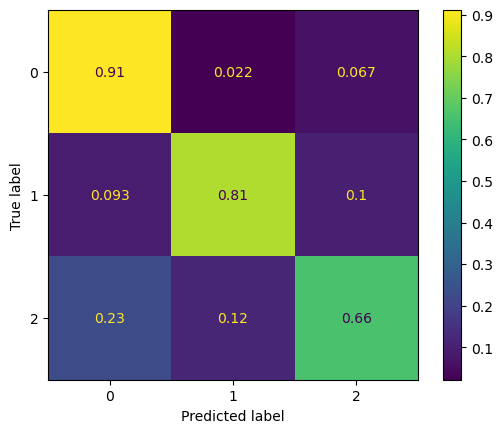

In [270]:
cls_label
disp.plot()
plt.show()

# Textual entailment

using glue rte
to get directionality between two sentences.

ie: check if once sentence follows other

In [4]:
from datasets import load_dataset, list_datasets
import numpy as np

# list_datasets()
# raw_datasets = load_dataset("amazon_polarity")
raw_datasets = load_dataset("glue","rte")

Found cached dataset glue (/Users/sanjeevhalyal/.cache/huggingface/datasets/glue/rte/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 2490
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 277
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3000
    })
})

In [6]:
checkpoint = "distilbert-base-uncased"

In [7]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [8]:
ss = raw_datasets["train"][0]

In [9]:
rs = ss["sentence1"] + " " + ss["sentence2"]


In [10]:
tokenizer(ss["sentence1"], ss["sentence2"])

{'input_ids': [101, 2053, 4255, 1997, 3742, 6215, 2179, 1999, 5712, 2664, 1012, 102, 4255, 1997, 3742, 6215, 2179, 1999, 5712, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [11]:
tokenizer.decode(tokenizer(ss["sentence1"], ss["sentence2"])["input_ids"])

'[CLS] no weapons of mass destruction found in iraq yet. [SEP] weapons of mass destruction found in iraq. [SEP]'

In [12]:
tokens = tokenizer.tokenize(ss["sentence1"], ss["sentence2"])
token_ids = tokenizer.convert_tokens_to_ids(tokens)

In [13]:
token_ids

[2053,
 4255,
 1997,
 3742,
 6215,
 2179,
 1999,
 5712,
 2664,
 1012,
 4255,
 1997,
 3742,
 6215,
 2179,
 1999,
 5712,
 1012]

In [14]:
tokenizer.decode(token_ids)

'no weapons of mass destruction found in iraq yet. weapons of mass destruction found in iraq.'

In [15]:
tokenizer.convert_ids_to_tokens(token_ids)

['no',
 'weapons',
 'of',
 'mass',
 'destruction',
 'found',
 'in',
 'iraq',
 'yet',
 '.',
 'weapons',
 'of',
 'mass',
 'destruction',
 'found',
 'in',
 'iraq',
 '.']

In [16]:
def tokenize_fn(batch):
    return tokenizer(batch["sentence1"],batch["sentence2"], truncation=True)

In [17]:
tokenized_datasets = raw_datasets.map(tokenize_fn, batched=True)

Loading cached processed dataset at /Users/sanjeevhalyal/.cache/huggingface/datasets/glue/rte/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad/cache-3ad1154a2500c217.arrow


Map:   0%|          | 0/277 [00:00<?, ? examples/s]

Loading cached processed dataset at /Users/sanjeevhalyal/.cache/huggingface/datasets/glue/rte/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad/cache-414b0fb88968b88d.arrow


In [18]:
from transformers import TrainingArguments

In [19]:
training_args =  TrainingArguments(
"model_1", evaluation_strategy='epoch', save_strategy='epoch', num_train_epochs=5 ,
    logging_steps=150)

In [20]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'classifier.w

In [21]:
type(model)

transformers.models.distilbert.modeling_distilbert.DistilBertForSequenceClassification

In [22]:
# !pip install torchinfo

In [23]:
from torchinfo import summary

summary(model), model

(================================================================================
 Layer (type:depth-idx)                                  Param #
 DistilBertForSequenceClassification                     --
 ├─DistilBertModel: 1-1                                  --
 │    └─Embeddings: 2-1                                  --
 │    │    └─Embedding: 3-1                              23,440,896
 │    │    └─Embedding: 3-2                              393,216
 │    │    └─LayerNorm: 3-3                              1,536
 │    │    └─Dropout: 3-4                                --
 │    └─Transformer: 2-2                                 --
 │    │    └─ModuleList: 3-5                             42,527,232
 ├─Linear: 1-2                                           590,592
 ├─Linear: 1-3                                           1,538
 ├─Dropout: 1-4                                          --
 Total params: 66,955,010
 Trainable params: 66,955,010
 Non-trainable params: 0
 ===================

In [24]:
#  to make sure we are only fine tunning head

params_before = []
for name, p in model.named_parameters():
    params_before.append(p.detach().cpu().numpy())

In [25]:
from transformers import Trainer
from datasets import load_metric

metric = load_metric("glue","rte")

/var/folders/0j/5__hz27s6d5gvt1vgl8zpwpw0000gn/T/ipykernel_5016/2600409904.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("glue","rte")


In [26]:
metric.compute(predictions=[1,0,1],references=[1,0,0]  )

{'accuracy': 0.6666666666666666}

In [27]:
# because trainer need this kind of function to get metrics
def compute_metrics(logits_labels):
    logits, lables = logits_labels
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions,references=lables  )

In [28]:
model.to("mps:0")

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [74]:
tokenized_datasets["train"][:1]

{'sentence1': ['No Weapons of Mass Destruction Found in Iraq Yet.'],
 'sentence2': ['Weapons of Mass Destruction Found in Iraq.'],
 'label': [1],
 'idx': [0],
 'input_ids': [[101,
   2053,
   4255,
   1997,
   3742,
   6215,
   2179,
   1999,
   5712,
   2664,
   1012,
   102,
   4255,
   1997,
   3742,
   6215,
   2179,
   1999,
   5712,
   1012,
   102]],
 'attention_mask': [[1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1]]}

In [30]:
# import torch
# from torch import nn

# class CustomTrainer(Trainer):
#     def compute_loss(self, model, inputs, return_outputs=False):
#         labels = inputs.get("labels")
#         # forward pass
#         outputs = model(**inputs)
#         logits = outputs.get("logits")
#         # compute custom loss (suppose one has 3 labels with different weights)
#         loss_fct = nn.CrossEntropyLoss(weight=torch.tensor([1.0, 2.0]))
#         loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
#         return (loss, outputs) if return_outputs else loss

trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_datasets["train"],
    eval_dataset = tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [31]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: sentence2, sentence1, idx. If sentence2, sentence1, idx are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/Users/sanjeevhalyal/.conda/envs/MachineLearning-3.8/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 2490
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1560


Epoch,Training Loss,Validation Loss,Accuracy
1,0.692400,0.699734,0.501805
2,0.609200,0.807043,0.563177
3,0.331900,1.248542,0.602888
4,0.170500,1.846208,0.613718
5,0.060000,2.048601,0.624549


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: sentence2, sentence1, idx. If sentence2, sentence1, idx are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 277
  Batch size = 8
Saving model checkpoint to model_1/checkpoint-312
Configuration saved in model_1/checkpoint-312/config.json
Model weights saved in model_1/checkpoint-312/pytorch_model.bin
tokenizer config file saved in model_1/checkpoint-312/tokenizer_config.json
Special tokens file saved in model_1/checkpoint-312/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: sentence2, sentence1, idx. If sentence2, sentence1, idx are not expected by `DistilBertForSequenceClassification.forward`,  you can safely igno

TrainOutput(global_step=1560, training_loss=0.37379066210526685, metrics={'train_runtime': 1019.5702, 'train_samples_per_second': 12.211, 'train_steps_per_second': 1.53, 'total_flos': 454158784333560.0, 'train_loss': 0.37379066210526685, 'epoch': 5.0})

In [32]:
tokenized_datasets["test"][0]['input_ids']

[101,
 2158,
 23296,
 2050,
 2001,
 11908,
 2044,
 5506,
 28600,
 6590,
 1005,
 1055,
 2905,
 9152,
 19114,
 18454,
 26086,
 1010,
 2040,
 2001,
 1996,
 2034,
 7409,
 1999,
 1996,
 2553,
 1012,
 102,
 18454,
 26086,
 2003,
 3141,
 2000,
 2158,
 23296,
 2050,
 1012,
 102]

In [34]:
from transformers import pipeline
new_model = pipeline("text-classification", model="./model_1/checkpoint-1560")

loading configuration file ./model_1/checkpoint-1560/config.json
Model config DistilBertConfig {
  "_name_or_path": "./model_1/checkpoint-1560",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.20.0",
  "vocab_size": 30522
}

2023-04-05 05:34:46.717448: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-05 05:34:46.718129: I tensorflow/core/common_

Metal device set to: Apple M1 Pro


All model checkpoint weights were used when initializing DistilBertForSequenceClassification.

All the weights of DistilBertForSequenceClassification were initialized from the model checkpoint at ./model_1/checkpoint-1560.
If your task is similar to the task the model of the checkpoint was trained on, you can already use DistilBertForSequenceClassification for predictions without further training.
Didn't find file ./model_1/checkpoint-1560/added_tokens.json. We won't load it.
loading file ./model_1/checkpoint-1560/vocab.txt
loading file ./model_1/checkpoint-1560/tokenizer.json
loading file None
loading file ./model_1/checkpoint-1560/special_tokens_map.json
loading file ./model_1/checkpoint-1560/tokenizer_config.json


In [35]:
new_model("the movie sucks", "So i am not watching it")

Ignoring args : ('So i am not watching it',)


[{'label': 'LABEL_1', 'score': 0.7895942330360413}]

In [84]:
raw_datasets["test"][10]

{'sentence1': 'State police said Greater Johnstown-Cambria County Convention and Visitors Bureau kept $52,574.11 from Thunder in the Valley 2005 beer sales that should have gone to two volunteer fire companies.',
 'sentence2': 'Greater Johnstown-Cambria County Convention and Visitors Bureau funded two volunteer fire companies.',
 'label': -1,
 'idx': 10}

In [80]:
tt = raw_datasets["test"][0]
tt2 = raw_datasets["test"][1]


In [81]:
new_model({"text": tt["sentence1"], "text_pair": tt["sentence2"]})

{'label': 'LABEL_0', 'score': 0.9988846182823181}

In [82]:
new_model([{"text":tt["sentence1"], "text_pair":tt["sentence2"]}, {"text":tt2["sentence1"], "text_pair": tt2["sentence2"]}])

[{'label': 'LABEL_0', 'score': 0.9988846182823181},
 {'label': 'LABEL_0', 'score': 0.9984694123268127}]

In [38]:
raw_datasets["train"][0]

{'sentence1': 'No Weapons of Mass Destruction Found in Iraq Yet.',
 'sentence2': 'Weapons of Mass Destruction Found in Iraq.',
 'label': 1,
 'idx': 0}

In [47]:
type(tokenized_datasets["test"])

datasets.arrow_dataset.Dataset

In [96]:
tokenizer.decode(tokenized_datasets["test"]["input_ids"][0])

"[CLS] mangla was summoned after madhumita's sister nidhi shukla, who was the first witness in the case. [SEP] shukla is related to mangla. [SEP]"

In [56]:
# !pip install evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 862.4 kB/s eta 0:00:00a 0:00:01


In [57]:
from evaluate import evaluator

task_evaluator = evaluator("text-classification")

In [98]:
eval_results = task_evaluator.compute(
    model_or_pipeline=new_model,
    data={"input_column":  tokenizer.decode(tokenized_datasets["test"][0])}
)
print(eval_results)

TypeError: Can't convert {'sentence1': "Mangla was summoned after Madhumita's sister Nidhi Shukla, who was the first witness in the case.", 'sentence2': 'Shukla is related to Mangla.', 'label': -1, 'idx': 0, 'input_ids': [101, 2158, 23296, 2050, 2001, 11908, 2044, 5506, 28600, 6590, 1005, 1055, 2905, 9152, 19114, 18454, 26086, 1010, 2040, 2001, 1996, 2034, 7409, 1999, 1996, 2553, 1012, 102, 18454, 26086, 2003, 3141, 2000, 2158, 23296, 2050, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]} to Sequence